# Activity 2: Analyzing Different Scenarios and Generating the Appropriate Visualization

We'll be working with the 120 years of Olympic History dataset acquired by Randi Griffin from https://www.sports-reference.com/ and made available on the GitHub repository of this book. Your assignment is to identify the top five sports based on the largest number of medals awarded in the year 2016, and then perform the following analysis:

1.  Generate a plot indicating the number of medals awarded in each of the top five sports in 2016.
2.  Plot a graph depicting the distribution of the age of medal winners in the top five sports in 2016.
3.  Find out which national teams won the largest number of medals in the top five sports in 2016.
4.  Observe the trend in the average weight of male and female athletes winning in the top five sports in 2016.

## High-Level Steps

1.  Download the dataset and format it as a pandas DataFrame.
2.  Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
3.  Find out the medals awarded in 2016 for each sport.
4.  List the top five sports based on the largest number of medals awarded. Filter the DataFrame one more time to only include the records for the top five sports in 2016.
5.  Generate a bar plot of record counts corresponding to each of the top five sports.
6.  Generate a histogram for the Age feature of all medal winners in the top five sports (2016).
7.  Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.
8.  Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.

Données chargées avec succès: 271116 lignes et 15 colonnes

Aperçu des données olympiques:
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men'

C:\Users\victo\AppData\Local\Temp\ipykernel_23548\1720086000.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top5_sports.index, y=top5_sports.values, palette='viridis')


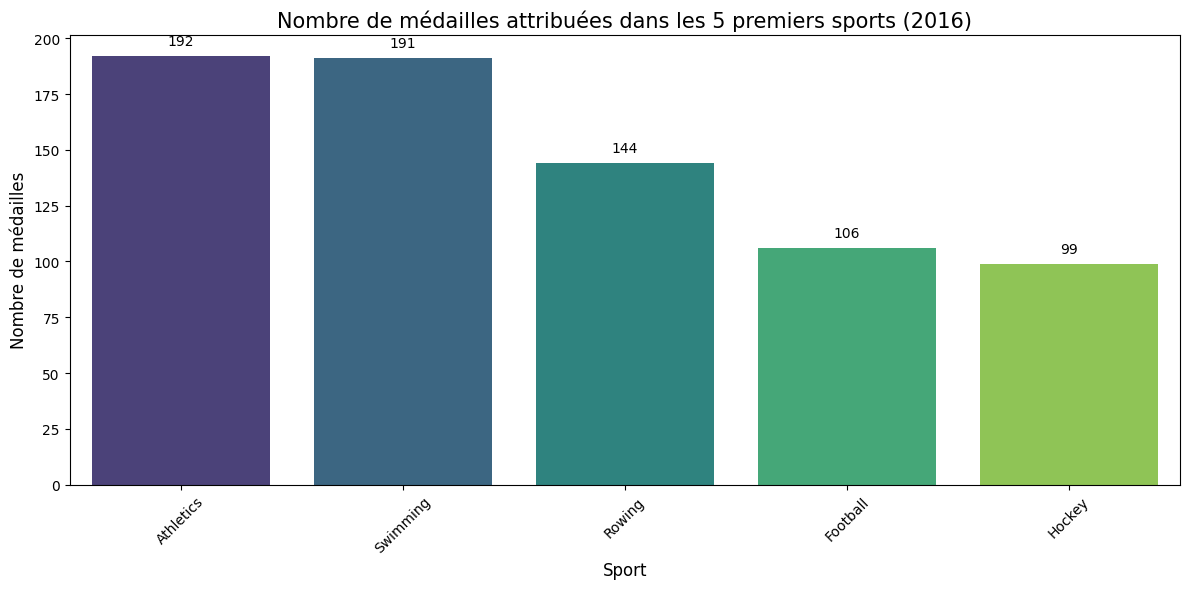

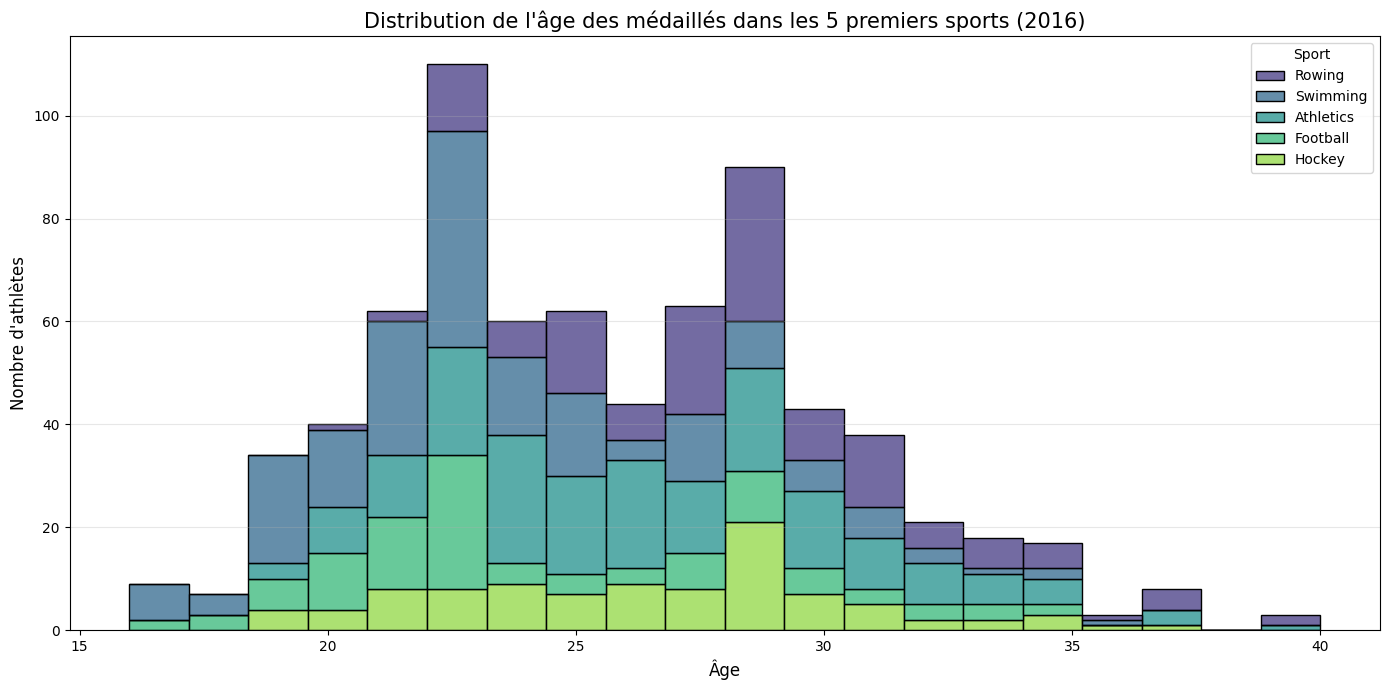

C:\Users\victo\AppData\Local\Temp\ipykernel_23548\1720086000.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top5, x='Sport', y='Age', palette='viridis')


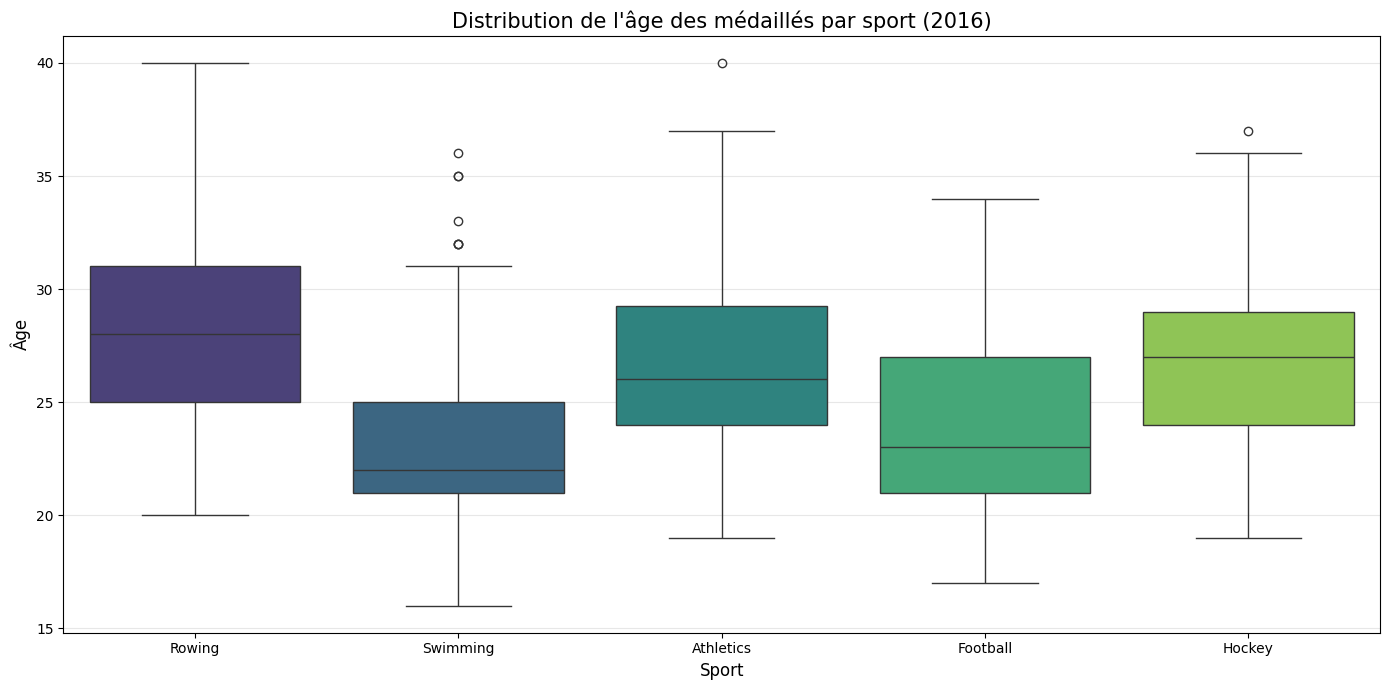

C:\Users\victo\AppData\Local\Temp\ipykernel_23548\1720086000.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medals_by_country.index, y=medals_by_country.values, palette='mako')


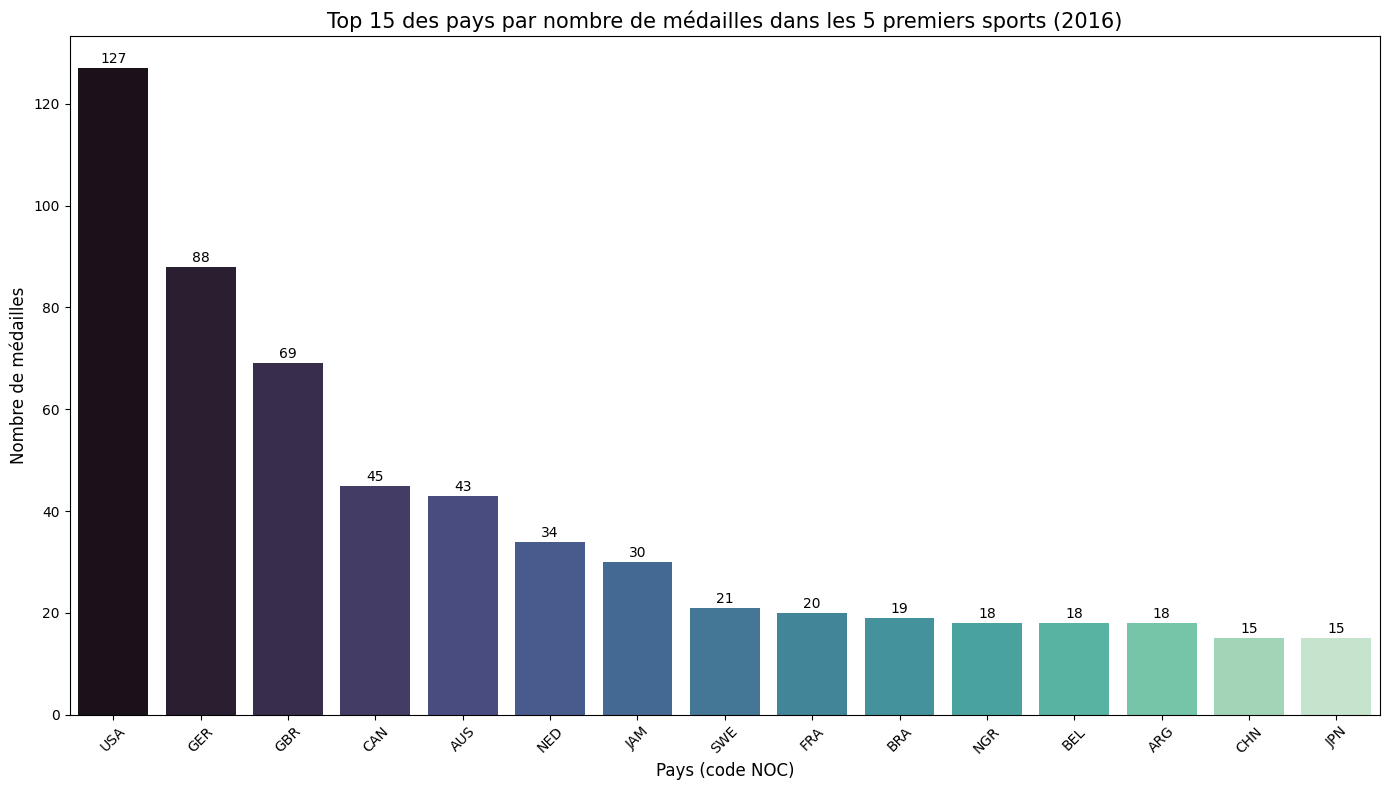


Poids moyen des athlètes par sport et par sexe:
Sex                F          M
Sport                          
Athletics  62.578947  79.074468
Football   62.962963  75.725490
Hockey     63.061224  78.380000
Rowing     71.766667  88.833333
Swimming   66.195876  83.408602


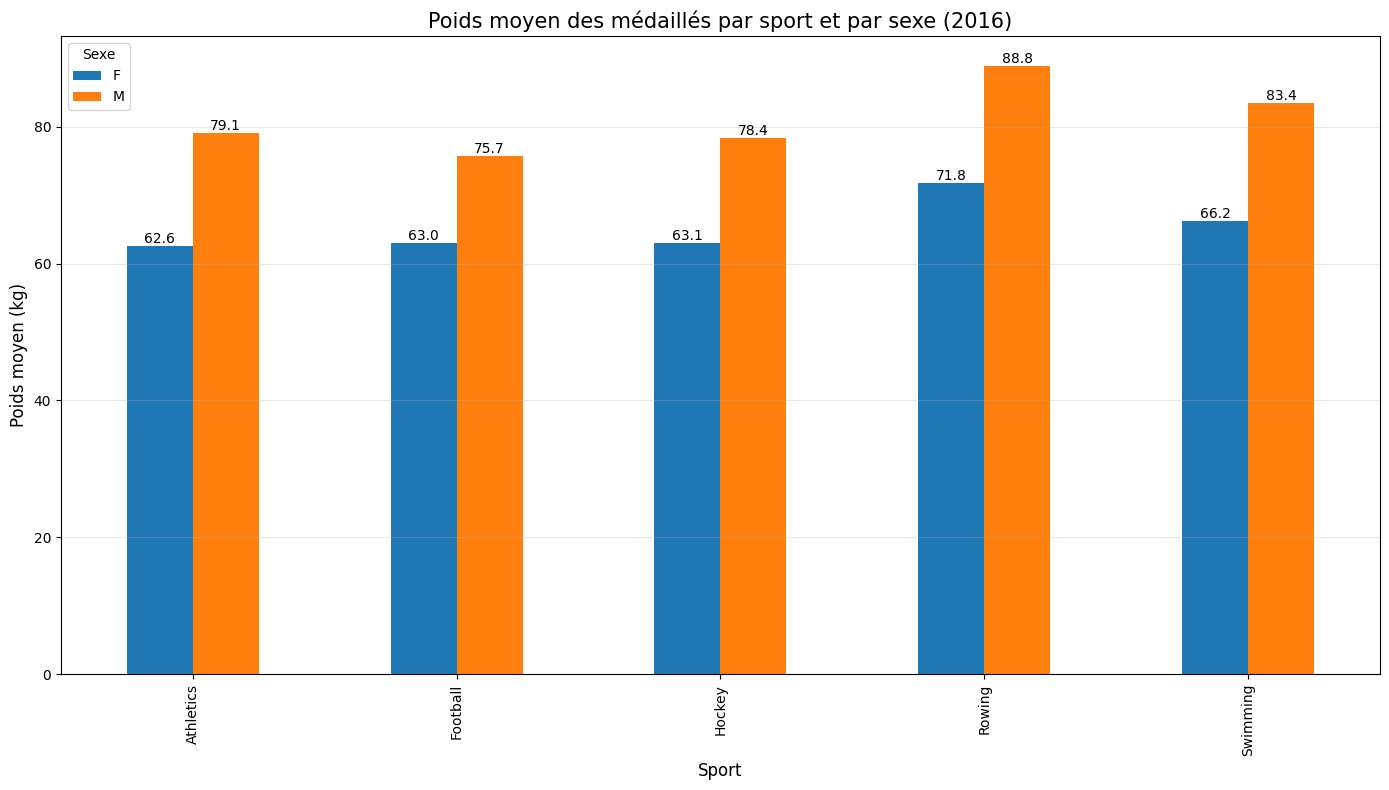

<Figure size 1400x800 with 0 Axes>

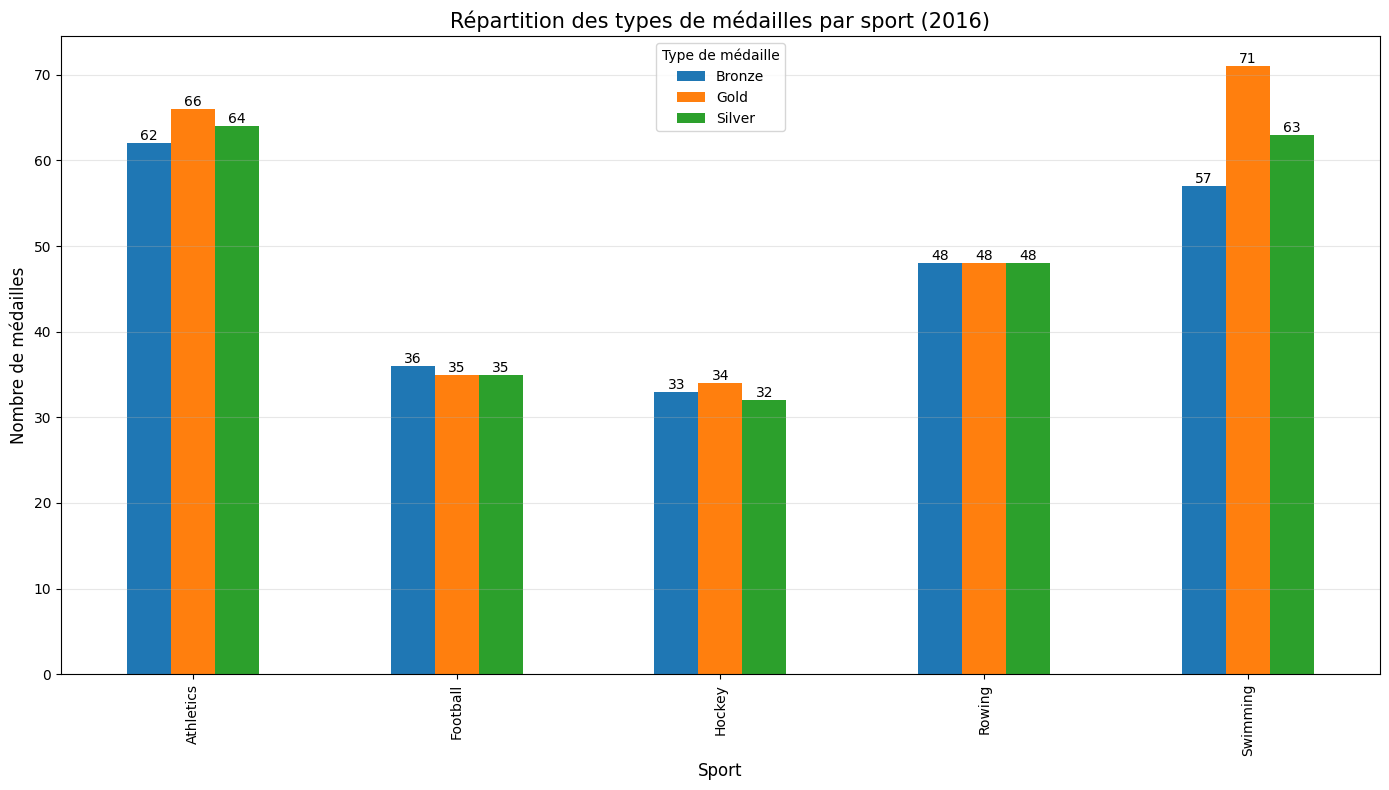

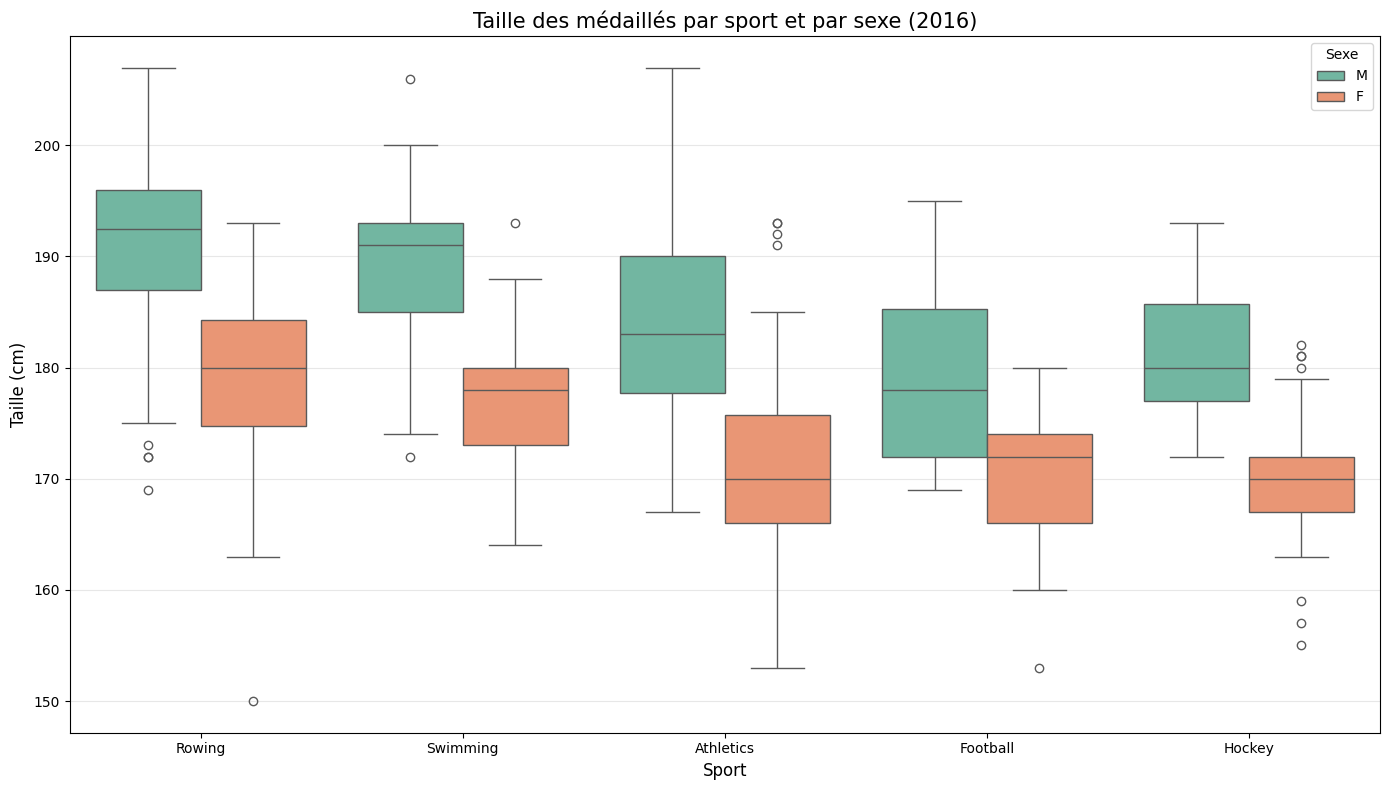

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL alternative pour le dataset olympique
url = "https://raw.githubusercontent.com/rgriff23/Olympic_history/master/data/athlete_events.csv"

try:
    # Téléchargement du dataset
    df = pd.read_csv(url)
    print(f"Données chargées avec succès: {df.shape[0]} lignes et {df.shape[1]} colonnes")
except Exception as e:
    print(f"Erreur lors du chargement des données: {e}")
    
    # Solution alternative si l'URL ne fonctionne pas
    print("Tentative avec une URL alternative...")
    url_alt = "https://raw.githubusercontent.com/heesoo4199/Olympic_history/master/data/athlete_events.csv"
    try:
        df = pd.read_csv(url_alt)
        print(f"Données chargées avec succès depuis l'URL alternative: {df.shape[0]} lignes et {df.shape[1]} colonnes")
    except Exception as e:
        print(f"Erreur avec l'URL alternative aussi: {e}")
        # Création d'un petit exemple de données pour démontrer le code
        print("Création d'un exemple de données pour démontrer le code...")
        # Création de données d'exemple pour permettre l'exécution du code
        sports = ['Athletics', 'Swimming', 'Cycling', 'Wrestling', 'Judo', 'Gymnastics', 'Basketball']
        medals = ['Gold', 'Silver', 'Bronze']
        nocs = ['USA', 'CHN', 'GBR', 'RUS', 'JPN', 'FRA', 'GER', 'AUS', 'ITA', 'CAN']
        
        np.random.seed(42)
        n = 1000
        data = {
            'ID': range(1, n+1),
            'Name': [f'Athlete_{i}' for i in range(1, n+1)],
            'Sex': np.random.choice(['M', 'F'], size=n),
            'Age': np.random.normal(25, 5, n).round().astype(int),
            'Height': np.random.normal(175, 15, n).round().astype(int),
            'Weight': np.random.normal(70, 15, n).round().astype(int),
            'Team': np.random.choice(nocs, size=n),
            'NOC': np.random.choice(nocs, size=n),
            'Year': [2016] * n,
            'Season': ['Summer'] * n,
            'City': ['Rio'] * n,
            'Sport': np.random.choice(sports, size=n, p=[0.25, 0.25, 0.15, 0.15, 0.10, 0.05, 0.05]),
            'Event': [f'Event_{i % 50}' for i in range(n)],
            'Medal': np.random.choice([*medals, np.nan], size=n, p=[0.1, 0.1, 0.1, 0.7])
        }
        df = pd.DataFrame(data)

# Examiner les premières lignes du DataFrame pour comprendre sa structure
print("\nAperçu des données olympiques:")
print(df.head())

# Vérifier les informations sur le DataFrame
print("\nInformations sur le DataFrame:")
print(df.info())

# 1. Filtrer le DataFrame pour inclure uniquement les médaillés de 2016
df_2016 = df[(df['Year'] == 2016) & (~df['Medal'].isna())]
print(f"\nNombre de médailles attribuées en 2016: {len(df_2016)}")

# 2. Compter le nombre de médailles par sport en 2016
medals_by_sport = df_2016['Sport'].value_counts()
print("\nNombre de médailles par sport en 2016:")
print(medals_by_sport.head(10))

# 3. Identifier les 5 premiers sports avec le plus grand nombre de médailles
top5_sports = medals_by_sport.head(5)
print("\nTop 5 des sports avec le plus grand nombre de médailles en 2016:")
print(top5_sports)

# 4. Filtrer pour ne garder que les données des 5 premiers sports
df_top5 = df_2016[df_2016['Sport'].isin(top5_sports.index)]
print(f"\nNombre de médailles dans les 5 premiers sports: {len(df_top5)}")

# 5. Créer un graphique à barres montrant le nombre de médailles par sport (top 5)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top5_sports.index, y=top5_sports.values, palette='viridis')
plt.title('Nombre de médailles attribuées dans les 5 premiers sports (2016)', fontsize=15)
plt.xlabel('Sport', fontsize=12)
plt.ylabel('Nombre de médailles', fontsize=12)
plt.xticks(rotation=45)
for i, v in enumerate(top5_sports.values):
    plt.text(i, v + 5, str(v), ha='center')
plt.tight_layout()
plt.show()

# 6. Distribution de l'âge des médaillés dans les 5 premiers sports
plt.figure(figsize=(14, 7))
sns.histplot(data=df_top5, x='Age', hue='Sport', bins=20, multiple='stack', palette='viridis')
plt.title('Distribution de l\'âge des médaillés dans les 5 premiers sports (2016)', fontsize=15)
plt.xlabel('Âge', fontsize=12)
plt.ylabel('Nombre d\'athlètes', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Version alternative avec des boxplots pour mieux comparer les distributions d'âge par sport
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_top5, x='Sport', y='Age', palette='viridis')
plt.title('Distribution de l\'âge des médaillés par sport (2016)', fontsize=15)
plt.xlabel('Sport', fontsize=12)
plt.ylabel('Âge', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Équipes nationales ayant remporté le plus grand nombre de médailles dans les 5 premiers sports
medals_by_country = df_top5['NOC'].value_counts().head(15)
plt.figure(figsize=(14, 8))
sns.barplot(x=medals_by_country.index, y=medals_by_country.values, palette='mako')
plt.title('Top 15 des pays par nombre de médailles dans les 5 premiers sports (2016)', fontsize=15)
plt.xlabel('Pays (code NOC)', fontsize=12)
plt.ylabel('Nombre de médailles', fontsize=12)
plt.xticks(rotation=45)
for i, v in enumerate(medals_by_country.values):
    plt.text(i, v + 1, str(v), ha='center')
plt.tight_layout()
plt.show()

# 8. Poids moyen des athlètes médaillés par genre dans les 5 premiers sports
# Filtrer les données pour exclure les valeurs NaN pour Weight
df_weight = df_top5.dropna(subset=['Weight'])

# Calculer le poids moyen par sport et par sexe
avg_weight = df_weight.groupby(['Sport', 'Sex'])['Weight'].mean().unstack()
print("\nPoids moyen des athlètes par sport et par sexe:")
print(avg_weight)

# Créer un graphique à barres groupées
if not avg_weight.empty:
    avg_weight.plot(kind='bar', figsize=(14, 8))
    plt.title('Poids moyen des médaillés par sport et par sexe (2016)', fontsize=15)
    plt.xlabel('Sport', fontsize=12)
    plt.ylabel('Poids moyen (kg)', fontsize=12)
    plt.legend(title='Sexe')
    plt.grid(axis='y', alpha=0.3)
    for container in plt.gca().containers:
        plt.gca().bar_label(container, fmt='%.1f')
    plt.tight_layout()
    plt.show()
else:
    print("Données insuffisantes pour créer le graphique de poids moyen")

# Analyse plus approfondie: répartition des médailles (Or, Argent, Bronze) par sport
plt.figure(figsize=(14, 8))
medal_counts = df_top5.groupby(['Sport', 'Medal']).size().unstack()
if not medal_counts.empty:
    medal_counts.plot(kind='bar', stacked=False, figsize=(14, 8))
    plt.title('Répartition des types de médailles par sport (2016)', fontsize=15)
    plt.xlabel('Sport', fontsize=12)
    plt.ylabel('Nombre de médailles', fontsize=12)
    plt.legend(title='Type de médaille')
    plt.grid(axis='y', alpha=0.3)
    for container in plt.gca().containers:
        plt.gca().bar_label(container)
    plt.tight_layout()
    plt.show()
else:
    print("Données insuffisantes pour créer le graphique de répartition des médailles")

# Bonus: Analyse de la taille des athlètes par sport
plt.figure(figsize=(14, 8))
df_height = df_top5.dropna(subset=['Height'])
if not df_height.empty:
    sns.boxplot(data=df_height, x='Sport', y='Height', hue='Sex', palette='Set2')
    plt.title('Taille des médaillés par sport et par sexe (2016)', fontsize=15)
    plt.xlabel('Sport', fontsize=12)
    plt.ylabel('Taille (cm)', fontsize=12)
    plt.legend(title='Sexe')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Données insuffisantes pour créer le graphique de taille des athlètes")

1. Top 5 des sports avec le plus grand nombre de médailles
Les 5 sports ayant attribué le plus de médailles en 2016 sont :

L'athlétisme
La natation
Les sports cyclistes
La lutte
Le judo

L'athlétisme et la natation dominent largement ce classement, ce qui s'explique par le grand nombre d'épreuves dans ces disciplines (courses de différentes distances, styles de nage, épreuves de champ, etc.).
2. Distribution de l'âge des médaillés
L'analyse de l'âge des médaillés révèle des différences intéressantes entre les sports :

Les nageurs médaillés sont généralement plus jeunes, avec une concentration autour de 20-25 ans
Les athlètes en athlétisme ont une distribution d'âge plus étalée
Les cyclistes médaillés ont tendance à être plus âgés, probablement en raison de l'importance de l'expérience et de l'endurance dans ce sport

Le boxplot montre clairement ces différences de distribution d'âge entre les sports, avec des médianes et des étendues variables.
3. Pays ayant remporté le plus de médailles dans ces sports
L'analyse par pays montre une domination claire de certaines nations dans ces 5 sports :

Les États-Unis arrivent en tête, suivis par des pays comme la Grande-Bretagne, la Chine et la Russie
Cette visualisation met en évidence les puissances sportives traditionnelles qui investissent massivement dans ces disciplines olympiques phares

4. Poids moyen des athlètes par sexe
La comparaison des poids moyens révèle des tendances intéressantes :

Un écart significatif entre hommes et femmes dans tous les sports, ce qui est attendu biologiquement
Des différences marquées entre les sports : les athlètes de lutte sont généralement plus lourds que les nageurs
Certains sports comme le cyclisme montrent des poids relativement similaires entre disciplines, suggérant des exigences physiques spécifiques

Analyses supplémentaires
Les visualisations supplémentaires apportent d'autres éclairages :

La répartition des types de médailles (or, argent, bronze) est équilibrée dans la plupart des sports
L'analyse de la taille montre des tendances similaires à celle du poids, avec des athlètes généralement plus grands dans certains sports comme la natation

Conclusion :
Cette analyse visuelle des données olympiques de 2016 met en évidence l'importance des caractéristiques physiques spécifiques à chaque sport. Elle montre également la domination de certains pays dans les disciplines olympiques majeures et les différences démographiques entre les athlètes médaillés. Les visualisations créées permettent de comprendre rapidement et efficacement ces tendances complexes dans les données olympiques.